In [3]:
library(data.table)
library(FactoMineR)
library(gplots)
library(factoextra)
library(corrplot)
#setwd("D:/1091/visualize_soilMap")  #筆電
setwd("C:/Users/user/Desktop/1091/thesisdata")
dat = fread("DetailedSoilMap.csv")
dat = dat[,-(2:4)]



In [6]:
res.ca = CA(dat, graph = FALSE, ncp = 3)
summary(res.ca)
print(res.ca)
# dt = as.table(as.matrix(dat[1:5, 1:5]))
# balloonplot(t(dt),xlab ="", ylab="", label = FALSE, show.margins = FALSE)
eig.val = get_eigenvalue(res.ca); eig.val




Call:
CA(X = dat, ncp = 3, graph = FALSE) 

The chi square of independence between the two variables is equal to 2229750456 (p-value =  0 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.241   0.003   0.001   0.000   0.000   0.000   0.000
% of var.             98.163   1.205   0.485   0.087   0.021   0.013   0.009
Cumulative % of var.  98.163  99.368  99.853  99.941  99.962  99.975  99.984
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13
Variance               0.000   0.000   0.000   0.000   0.000   0.000
% of var.              0.006   0.003   0.003   0.002   0.002   0.001
Cumulative % of var.  99.990  99.993  99.996  99.998  99.999 100.000

Rows (the 10 first)
        Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr
1     |     0.007 |  0.084  0.000  0.000 |  4.798  0.101  0.422 |  5.310  0.306
2     |     0.002 | -0.120  0.000  0.005 |  1.677  0.076  0.945 | -0.136  0.001


,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.408770e-01,9.816336e+01,98.16336
Dim.2,2.956848e-03,1.204989e+00,99.36835
Dim.3,1.190265e-03,4.850625e-01,99.85341
Dim.4,2.145404e-04,8.743054e-02,99.94084
Dim.5,5.123647e-05,2.088013e-02,99.96172
Dim.6,3.196911e-05,1.302820e-02,99.97475
Dim.7,2.304645e-05,9.392000e-03,99.98414
Dim.8,1.541800e-05,6.283217e-03,99.99043
Dim.9,6.624018e-06,2.699452e-03,99.99313
Dim.10,6.196018e-06,2.525031e-03,99.99565


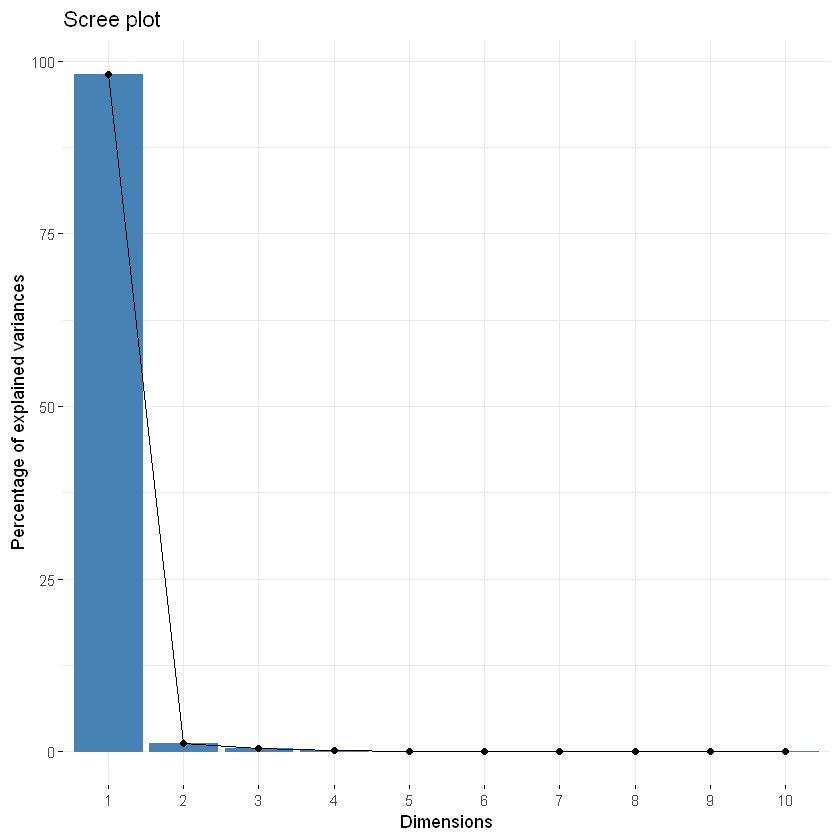

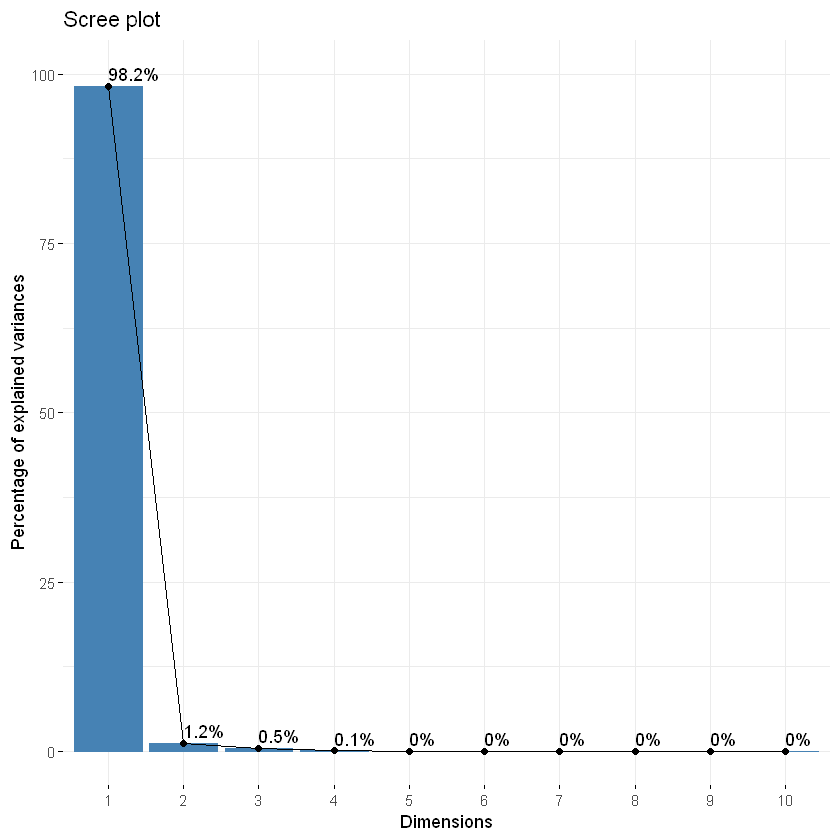

In [7]:
fviz_eig(res.ca)
fviz_screeplot(res.ca, addlabels = TRUE, ylim = c(0, 100))

In [8]:
## 必須先加總成烈連表，才能做

datt = table(dat$第一層質地, dat$排水等級)
res.ca = CA(datt, graph = FALSE, ncp = 3)
summary(res.ca)
print(res.ca)
eig.val = get_eigenvalue(res.ca); eig.val
dt = as.table(as.matrix(datt))


Call:
CA(X = datt, ncp = 3, graph = FALSE) 

The chi square of independence between the two variables is equal to 34656.48 (p-value =  0 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5
Variance               1.000   0.039   0.030   0.001   0.000
% of var.             93.397   3.633   2.824   0.129   0.017
Cumulative % of var.  93.397  97.030  99.854  99.983 100.000

Rows (the 10 first)
     Iner*1000     Dim.1     ctr    cos2     Dim.2     ctr    cos2     Dim.3
0  |   875.772 |   2.655  87.577   1.000 |   0.000   0.000   0.000 |   0.000
1  |     1.462 |  -0.377   0.054   0.369 |  -0.474   2.193   0.583 |  -0.134
2  |     2.809 |  -0.377   0.256   0.913 |  -0.015   0.010   0.001 |  -0.115
3  |    32.247 |  -0.377   1.966   0.610 |   0.231  18.944   0.229 |  -0.183
4  |    44.735 |  -0.377   1.555   0.348 |  -0.506  72.207   0.628 |  -0.098
5  |    45.029 |  -0.377   4.475   0.994 |   0.020   0.318   0.003 |   0.000
6  |    26.054 |  -0.377   2.255   0.865 |

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.0000000000,93.39667151,93.39667
Dim.2,0.0389014229,3.63326342,97.02993
Dim.3,0.0302387195,2.82419575,99.85413
Dim.4,0.0013827924,0.12914821,99.98328
Dim.5,0.0001790333,0.01672111,100.00000


In [ ]:
balloonplot(t(dt),xlab ="", ylab="", label = FALSE, show.margins = FALSE)

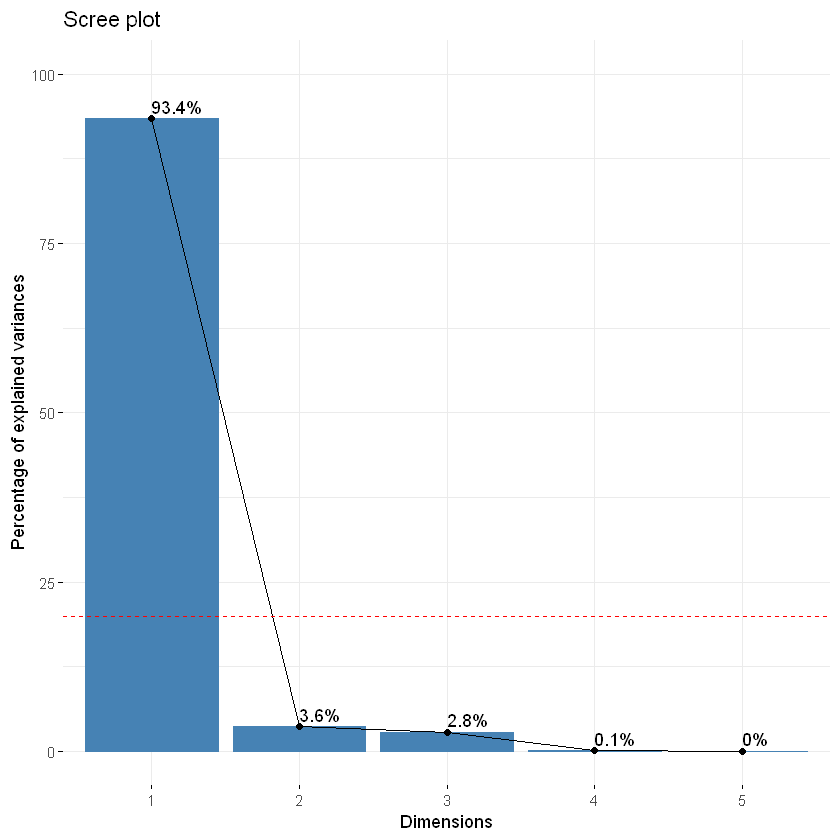

In [9]:
fviz_screeplot(res.ca, addlabels = TRUE, ylim = c(0, 100)) +
  geom_hline(yintercept=(1/(ncol(datt)-1))*100, linetype=2, color="red")


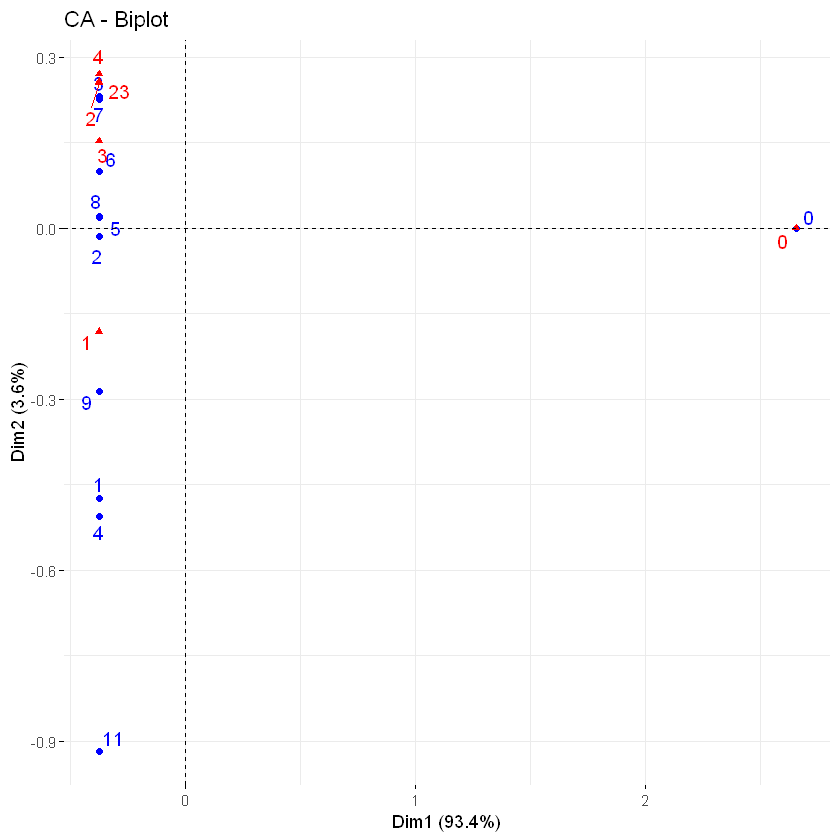

In [10]:
# repel= TRUE to avoid text overlapping (slow if many point)
fviz_ca_biplot(res.ca, repel = TRUE)

In [11]:
# for row
row <- get_ca_row(res.ca); row
head(row$coord)

Correspondence Analysis - Results for rows
  Name       Description                
1 "$coord"   "Coordinates for the rows" 
2 "$cos2"    "Cos2 for the rows"        
3 "$contrib" "contributions of the rows"
4 "$inertia" "Inertia of the rows"      

,Dim 1,Dim 2,Dim 3
0,2.6551344,4.179875e-17,8.368019e-17
1,-0.3766288,-4.738434e-01,-1.340840e-01
2,-0.3766288,-1.484572e-02,-1.154294e-01
3,-0.3766288,2.306207e-01,-1.825538e-01
4,-0.3766288,-5.062202e-01,-9.849027e-02
5,-0.3766288,1.979870e-02,-1.488784e-04


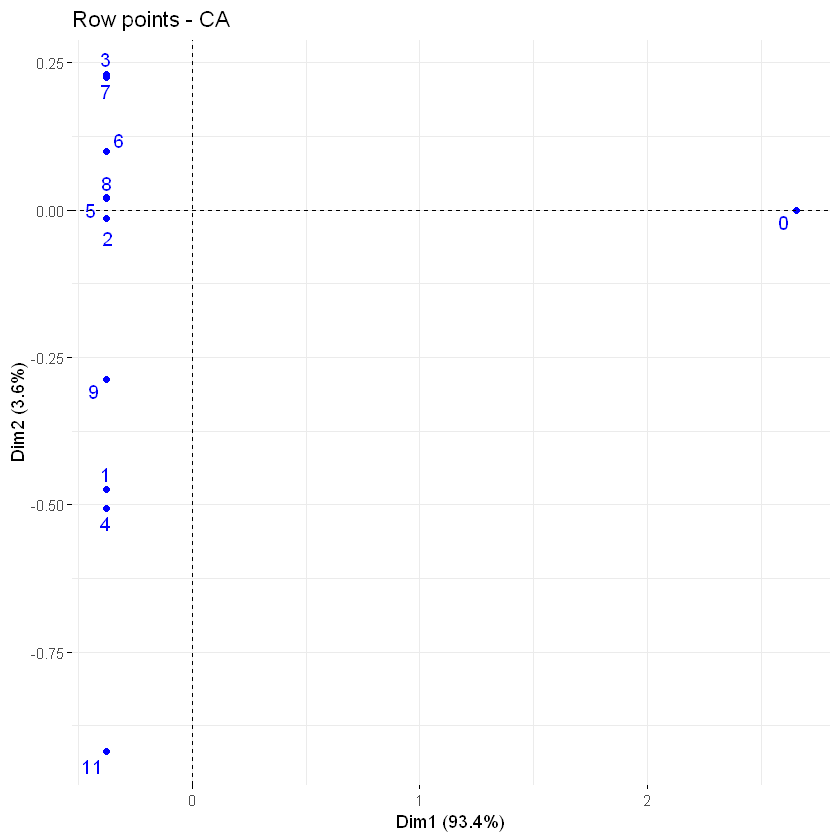

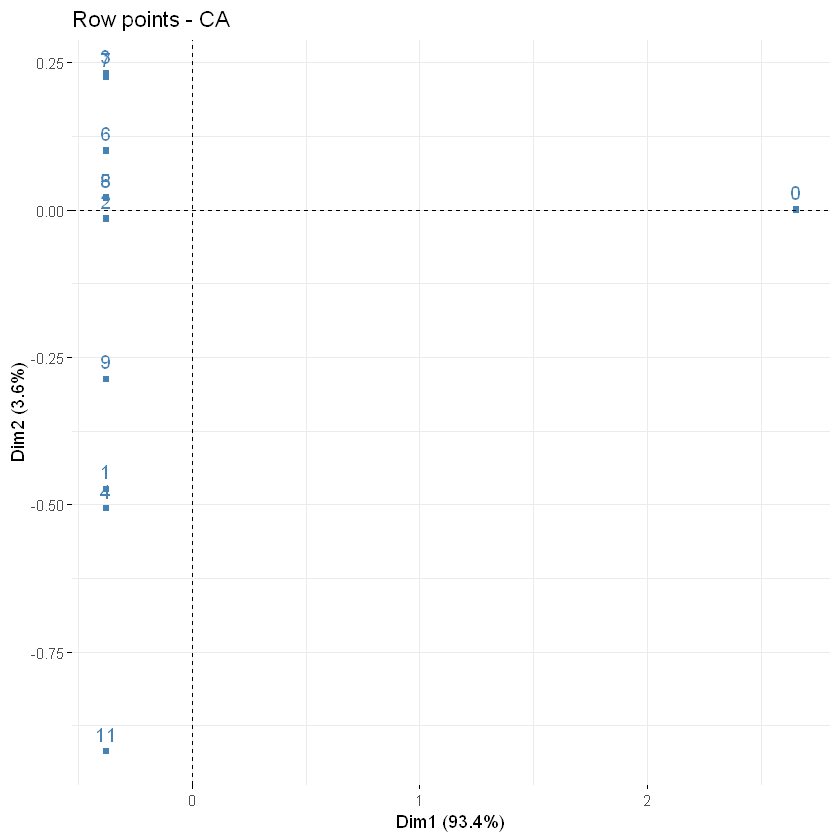

In [12]:
fviz_ca_row(res.ca, repel = TRUE)
fviz_ca_row(res.ca, col.row="steelblue", shape.row = 15)

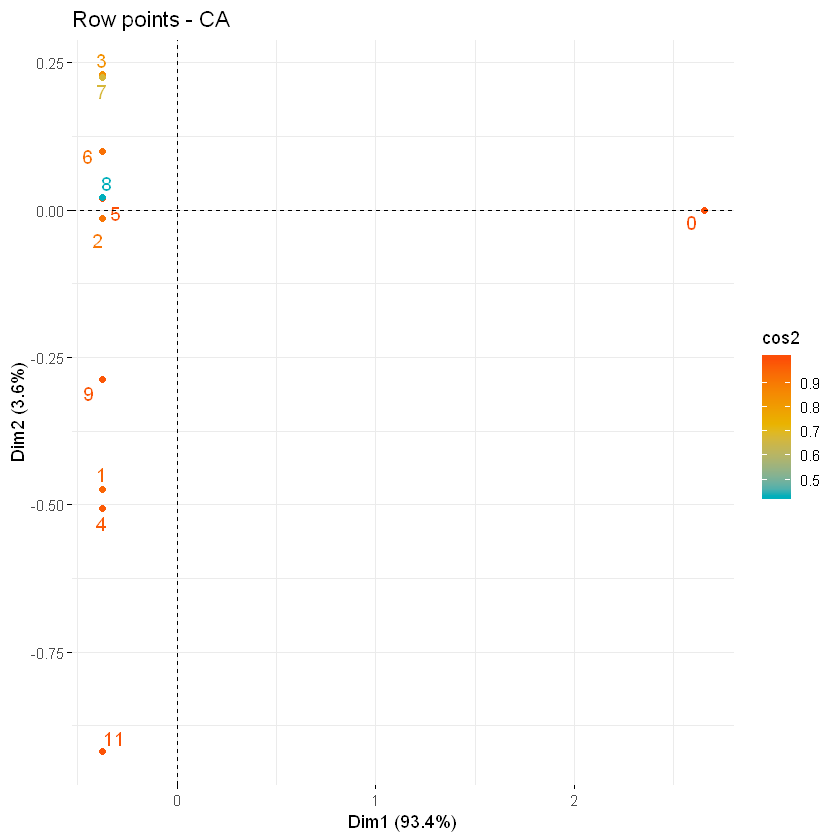

In [13]:
# Color by cos2 values: quality on the factor map
# 漸層色
fviz_ca_row(res.ca, col.row = "cos2",
            gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
            repel = TRUE)

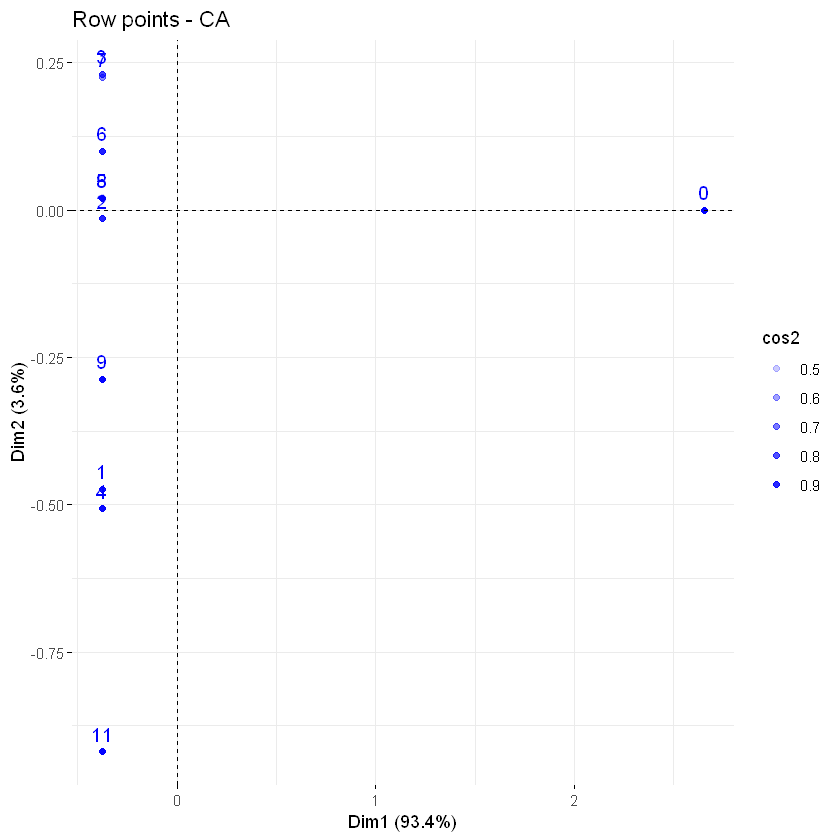

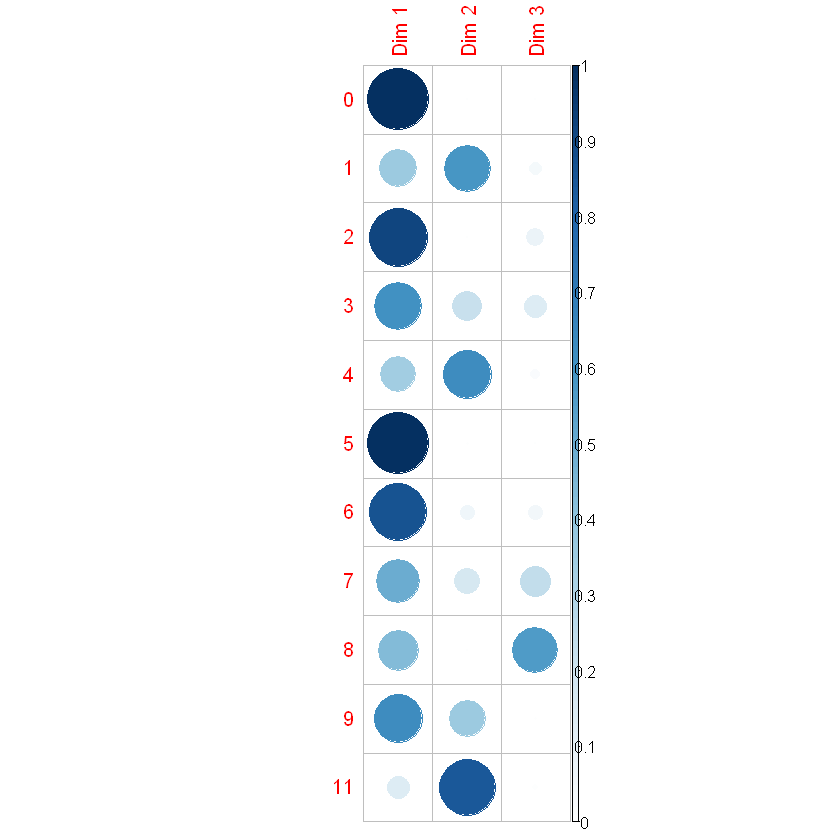

In [14]:
# 透明度
fviz_ca_row(res.ca, alpha.row="cos2")
# cor plot 並非變異矩陣，因此F，使用cos2(squared correlations)
corrplot(row$cos2, is.corr=FALSE)

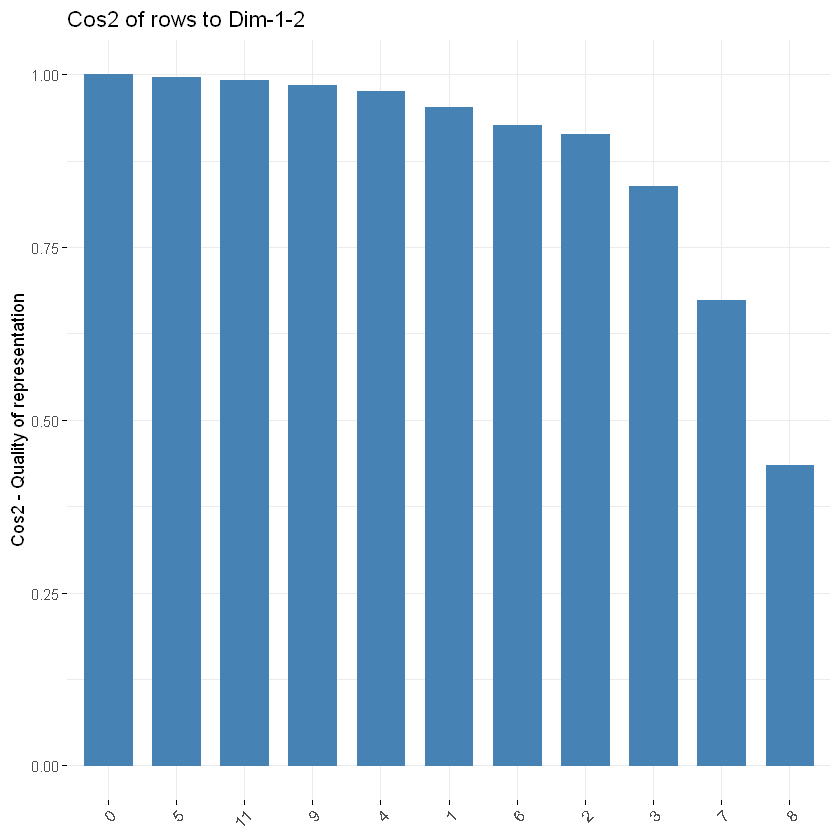

In [15]:
# Cos2 of rows on Dim.1 and Dim.2
fviz_cos2(res.ca, choice = "row", axes = 1:2)

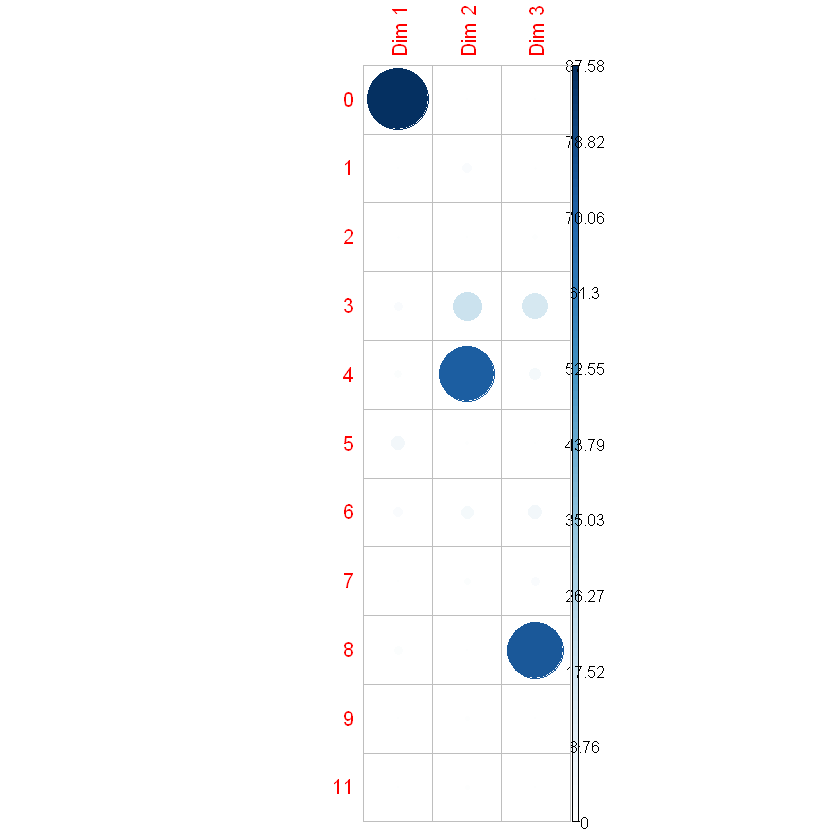

In [17]:
# 使用變異解釋百分比
corrplot(row$contrib, is.corr=FALSE)    

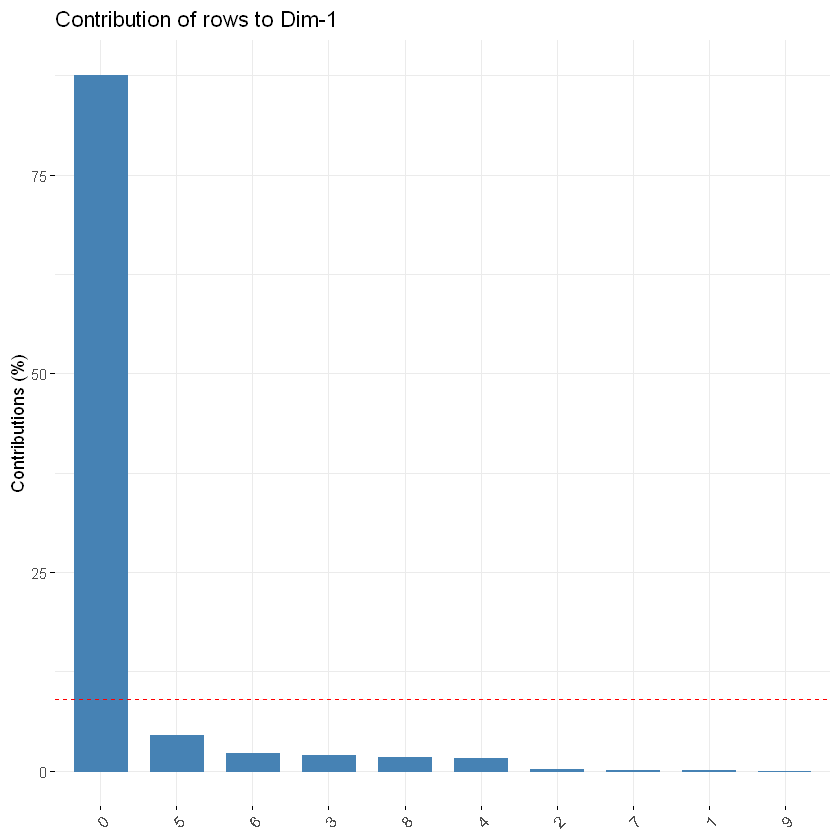

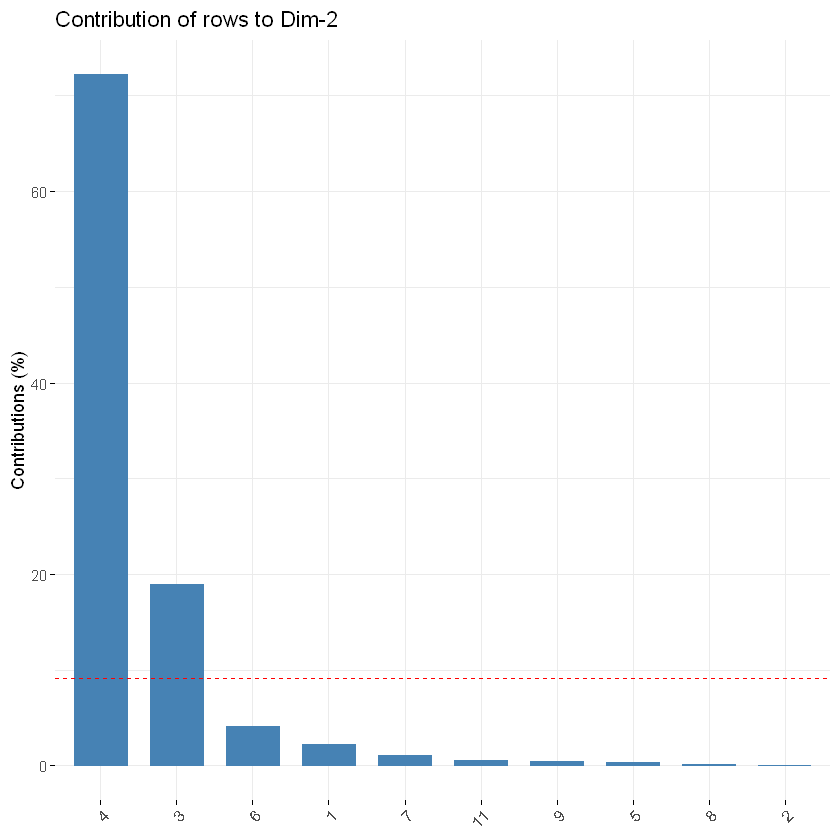

In [18]:
## 第一及第二為解釋變數的變異量
# Contributions of rows to dimension 1
fviz_contrib(res.ca, choice = "row", axes = 1, top = 10)
# Contributions of rows to dimension 2
fviz_contrib(res.ca, choice = "row", axes = 2, top = 10)

Warning message:
"package 'pheatmap' was built under R version 3.6.3"
Warning message in rbind(one, two, three, four):
"number of columns of result is not a multiple of vector length (arg 1)"


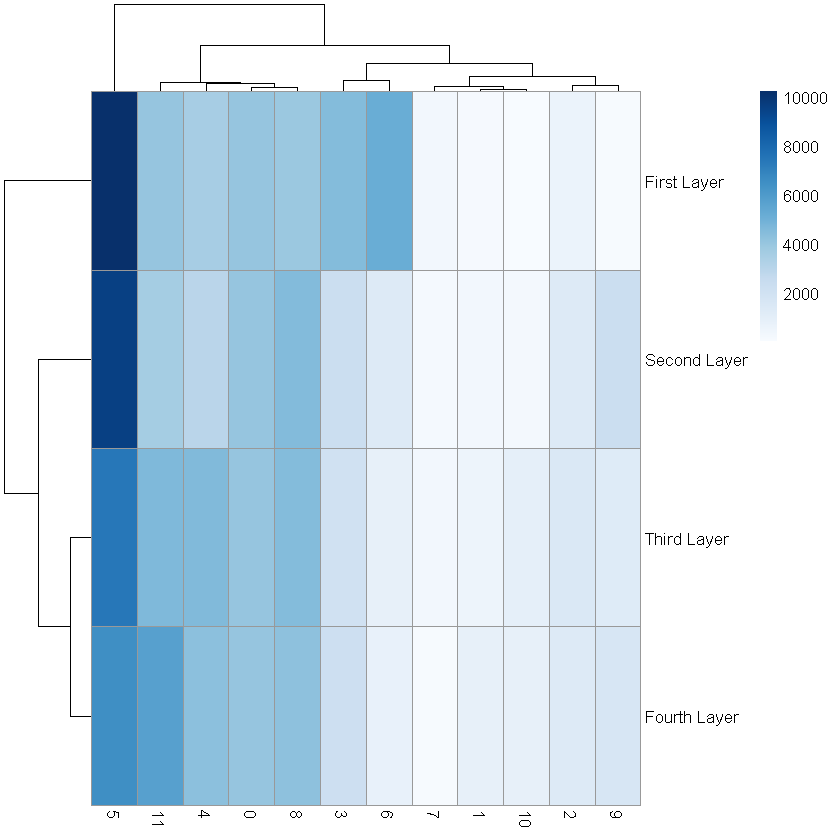

In [20]:
####################################################
###          20201019 pheatmap                   ###
####################################################
library(pheatmap)

one = table(dat$第一層質地)
two = table(dat$第二層質地)
three = table(dat$第三層質地)
four = table(dat$第四層質地)
# cb = cbind(one,two, three, four)
rb = rbind(one,two, three, four)
level = c("First", "Second", "Third", "Fourth")
colors = colorRampPalette( 
  RColorBrewer::brewer.pal(9, "Blues"))(255)

pheatmap(rb, cluster_rows = T, cluster_cols = T,
         labels_row = paste0(level, " Layer"), col = colors
         )